In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL

In [25]:
data_path='‪D:\\Data\\flower_photos'
data_path

'\u202aD:\\Data\\flower_photos'

In [27]:
data_path = data_path.strip("\u202a")
data_path

'D:\\Data\\flower_photos'

In [29]:
data_path=pathlib.Path(data_path)

In [31]:
data_path

WindowsPath('D:/Data/flower_photos')

In [35]:
len(list(data_path.glob('*/*.jpg')))

3670

In [37]:
roses=list(data_path.glob('roses/*'))

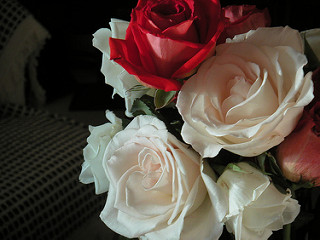

In [43]:
PIL.Image.open(roses[1])

In [45]:
img_dic={
    'daisy': list(data_path.glob('daisy/*')),
    'dandelion': list(data_path.glob('dandelion/*')),
    'roses': list(data_path.glob('roses/*')),
    'sunflowers': list(data_path.glob('sunflowers/*')),
    'tulips': list(data_path.glob('tulips/*'))

    
}

In [47]:
img_label={
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4
    
}

In [55]:
## Reading image files and converting it inoto numpy array
x,y=[],[]
for i,j in img_dic.items():
    for image in j:
        img=cv2.imread(str(image))
        rescaled_img=cv2.resize(img,(180,180))
        x.append(rescaled_img)
        y.append(img_label[i])

In [61]:
x=np.array(x)
y=np.array(y)

In [63]:
x.shape

(3670, 180, 180, 3)

In [65]:
y.shape

(3670,)

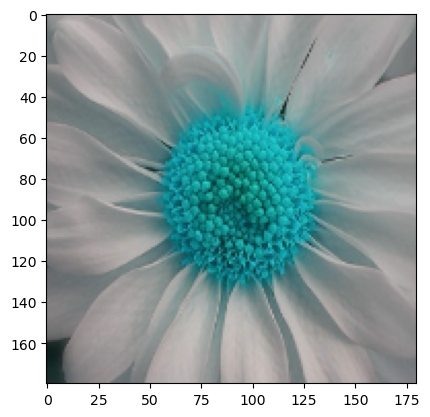

In [69]:
plt.imshow(x[0])

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [75]:
X_train=X_train/255
X_test=X_test/255

In [85]:
## Using CNN

model=models.Sequential([
   ##CNN 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

##ANN
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5,activation='sigmoid')
])


In [87]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [89]:
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 222ms/step - accuracy: 0.4088 - loss: 1.4251
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - accuracy: 0.6483 - loss: 0.9440
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - accuracy: 0.7131 - loss: 0.7603
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 211ms/step - accuracy: 0.7921 - loss: 0.5827
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.8706 - loss: 0.3889
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - accuracy: 0.9436 - loss: 0.1893
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.9661 - loss: 0.1336
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - accuracy: 0.9881 - loss: 0.0554
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - accuracy: 0.9916 - loss: 0.0433
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 218ms/step - accuracy: 0.9938 - loss: 0.0284
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - accuracy: 0.9878 - loss: 0.0586
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 21

In [91]:
model.evaluate(X_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.6669 - loss: 2.1733


[2.223629951477051, 0.6539509296417236]

In [93]:
## Improving the test score and minimize the overfitting
img_augmantation=models.Sequential([
    layers.RandomFlip(mode="horizontal_and_vertical", seed=None, data_format=None),
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),
    
])

In [99]:
new_model=models.Sequential([
   ##CNN 
  img_augmantation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

##ANN
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5,activation='sigmoid')
])

new_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [101]:
new_model.fit(X_train,y_train,epochs=8)

Epoch 1/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 276ms/step - accuracy: 0.3123 - loss: 1.6750
Epoch 2/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 304ms/step - accuracy: 0.5210 - loss: 1.1605
Epoch 3/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 282ms/step - accuracy: 0.5934 - loss: 1.0191
Epoch 4/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 285ms/step - accuracy: 0.6239 - loss: 0.9384
Epoch 5/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 293ms/step - accuracy: 0.6609 - loss: 0.9021
Epoch 6/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 285ms/step - accuracy: 0.6792 - loss: 0.8494
Epoch 7/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 287ms/step - accuracy: 0.6951 - loss: 0.7968
Epoch 8/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 291ms/step - accuracy: 0.7170 - loss: 0.7403


In [105]:
new_model.evaluate(X_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6760 - loss: 0.8713


[0.8873863220214844, 0.667574942111969]